# Daft.ie EDA

<p>In this notebook we will work with the data of the of houses publisheds in the month of January 2022 in the website <a href="https://www.daft.ie/">Daft.ie</a>.</p>
<p>The data used was extracted from a <a href="https://www.kaggle.com/datasets/eavannan/daftie-house-price-data">Kaggle dataset</a>!</p>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
import pandas as pd

# Read CSV file without setting any column as the index
df = pd.read_csv("daft_data_01_2022.csv", index_col=False)


In [212]:
df

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,3644416,"13 Cherry Close, Bellfield, Waterford",standard,2022-01-24,235000,3,3,Semi-D,103.0,Buy,...,Robert Forbes,Forbes Property,BRANDED_AGENT,24.0,False,True,False,A1,-7.212145,53.647194
3963,3644275,"8 Thomas Street, Castlebar, Co. Mayo",standard,2022-01-30,149500,3,1,Bungalow,82.0,Buy,...,DNG John O' Brien Office,DNG John O’Brien,UNBRANDED_AGENT,14.0,True,False,False,A3,-6.753848,54.115088
3964,3644111,"69 McAuley Drive, Artane, Artane, Dublin 5",standard,2022-01-28,375000,3,1,Terrace,NaN,Buy,...,Jackie Horan,Sherry FitzGerald New Homes,BRANDED_AGENT,25.0,False,False,False,A2,-6.086274,53.146090
3965,3644099,"School Land, Ballinalee, Co. Longford",standard,2021-12-04,170000,4,2,Detached,128.0,Buy,...,Tom Hickey,Hickey O'Donoghue Auctioneers Ltd.,BRANDED_AGENT,38.0,False,True,False,A2,-8.652927,52.664558


In [213]:
# Checking df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


In [214]:
# Counting null values
null_counts = df.isna().sum()
print(null_counts)

id                    0
title                 0
featuredLevel         0
publishDate           0
price                 0
numBedrooms           0
numBathrooms          0
propertyType          0
propertySize        355
category              0
AMV_price             0
sellerId              0
seller_name           0
seller_branch         0
sellerType            0
m_totalImages         0
m_hasVideo            0
m_hasVirtualTour      0
m_hasBrochure         0
ber_rating            0
longitude             0
latitude              0
dtype: int64


In [215]:
#Use the unique function to check for misspelling
print(df["m_hasVideo"].unique())
print(df["m_hasVirtualTour"].unique())
print(df["m_hasBrochure"].unique())
print(df["sellerType"].unique())

[False  True]
[False  True]
[False  True]
['BRANDED_AGENT' 'UNBRANDED_AGENT' 'PRIVATE_USER']


The values of those three columns (<i>m_hasVideo, m_hasVirtualTour, m_hasBrochure</i>) are booleans, we will change them for 0 = <b>False</b> and 1 = <b>True</b>.
<p>We will also change the name to facilitate visualisation.</p>

In [216]:
# Convert from bool to int, the value will change as bool can only be 0 or 1
df["m_hasVideo"] = df["m_hasVideo"].astype(int)
df["m_hasVirtualTour"] = df["m_hasVirtualTour"].astype(int)
df["m_hasBrochure"] = df["m_hasBrochure"].astype(int)

In [217]:
# Renaming columns
df.rename(columns= {"m_totalImages": "total_images", "m_hasVideo": "video", "m_hasVirtualTour": "virtual_tour", "m_hasBrochure": "brochure"}, inplace = True)

In [218]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,0,0,0,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,0,0,0,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,0,1,0,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,0,0,0,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,0,0,0,G,-6.879797,53.728601


Reorganasing id/index column

In [219]:
#Drop the 'id' column
df.drop(columns='id', inplace=True)

# Reset index and make it the new 'id' column
df.reset_index(drop=True, inplace=True)
# https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv

# Rename the index column to 'id'
df.rename(columns={'index': 'id'}, inplace=True)

df.tail()

,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,AMV_price,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
3962,"13 Cherry Close, Bellfield, Waterford",standard,2022-01-24,235000,3,3,Semi-D,103.0,Buy,0,...,Robert Forbes,Forbes Property,BRANDED_AGENT,24.0,0,1,0,A1,-7.212145,53.647194
3963,"8 Thomas Street, Castlebar, Co. Mayo",standard,2022-01-30,149500,3,1,Bungalow,82.0,Buy,0,...,DNG John O' Brien Office,DNG John O’Brien,UNBRANDED_AGENT,14.0,1,0,0,A3,-6.753848,54.115088
3964,"69 McAuley Drive, Artane, Artane, Dublin 5",standard,2022-01-28,375000,3,1,Terrace,NaN,Buy,0,...,Jackie Horan,Sherry FitzGerald New Homes,BRANDED_AGENT,25.0,0,0,0,A2,-6.086274,53.146090
3965,"School Land, Ballinalee, Co. Longford",standard,2021-12-04,170000,4,2,Detached,128.0,Buy,0,...,Tom Hickey,Hickey O'Donoghue Auctioneers Ltd.,BRANDED_AGENT,38.0,0,1,0,A2,-8.652927,52.664558
3966,"14 Coolmagort Ave, Beaufort, Killarney, Co. Kerry",standard,2022-01-30,250000,3,2,Bungalow,116.0,Buy,0,...,Coonan Naas,Coonan Estate Agents Ltd,UNBRANDED_AGENT,69.0,0,1,0,A3,-6.792938,53.166008


In [220]:
# call describe function to chec statistical properties of the column
df["propertySize"].describe()

count    3612.000000
mean      132.673865
std       295.246580
min         1.000000
25%        78.000000
50%       103.000000
75%       137.000000
max      8600.000000
Name: propertySize, dtype: float64

In [221]:
# fill up NaN with mean value to allow better statistical analysis (mean imputation)
# https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values?dc_referrer=https%3A%2F%2Fwww.google.com%2F
df["propertySize"].fillna(132)

0        96.0
1        93.0
2       162.0
3       132.0
4        68.0
        ...  
3962    103.0
3963     82.0
3964    132.0
3965    128.0
3966    116.0
Name: propertySize, Length: 3967, dtype: float64

In [222]:
# check again for null values
df["propertySize"].isna().sum()

355

In [223]:
# set published date as a date column
df["publishDate"] = pd.to_datetime(df["publishDate"])
df["publishDate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3967 entries, 0 to 3966
Series name: publishDate
Non-Null Count  Dtype         
--------------  -----         
3967 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 31.1 KB


In [224]:
# AMV or advised minimum value has only 0 and 1, so we can drop this column as it wont add anything to our analysis
df["AMV_price"].unique()


array([0, 1], dtype=int64)

In [225]:
# dropping columns that wont be of much use for EDA
df = df.drop(["AMV_price", "sellerId", "seller_name", "seller_branch"], axis =1)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          3967 non-null   object        
 1   featuredLevel  3967 non-null   object        
 2   publishDate    3967 non-null   datetime64[ns]
 3   price          3967 non-null   int64         
 4   numBedrooms    3967 non-null   int64         
 5   numBathrooms   3967 non-null   int64         
 6   propertyType   3967 non-null   object        
 7   propertySize   3612 non-null   float64       
 8   category       3967 non-null   object        
 9   sellerType     3967 non-null   object        
 10  total_images   3967 non-null   float64       
 11  video          3967 non-null   int32         
 12  virtual_tour   3967 non-null   int32         
 13  brochure       3967 non-null   int32         
 14  ber_rating     3967 non-null   object        
 15  longitude      3967 n

In [229]:
df.head()

,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
0,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,BRANDED_AGENT,16.0,0,0,0,C2,-8.382500,51.822940
1,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,BRANDED_AGENT,33.0,0,0,0,C1,-7.177098,53.157465
2,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,BRANDED_AGENT,38.0,0,1,0,A3,-6.342763,53.269493
3,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,BRANDED_AGENT,22.0,0,0,0,C2,-8.640716,52.629588
4,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,BRANDED_AGENT,5.0,0,0,0,G,-6.879797,53.728601


##### Check correlation of the numarical columns

In [240]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Display correlation matrix
correlation_matrix


,price,numBedrooms,numBathrooms,propertySize,total_images,video,virtual_tour,brochure,longitude,latitude
price,1.000000,0.361985,0.385685,0.086300,-0.008185,-0.010082,-0.003794,0.012194,-0.016931,-0.017384
numBedrooms,0.361985,1.000000,0.655764,0.116418,0.008091,-0.005981,-0.000421,0.003803,-0.010038,-0.020704
numBathrooms,0.385685,0.655764,1.000000,0.102922,0.008435,-0.008011,0.007622,0.027467,-0.001025,-0.024356
propertySize,0.086300,0.116418,0.102922,1.000000,0.021966,0.009111,-0.015041,-0.011060,-0.005365,-0.010473
total_images,-0.008185,0.008091,0.008435,0.021966,1.000000,0.136186,0.094163,-0.054863,-0.001821,-0.051916
video,-0.010082,-0.005981,-0.008011,0.009111,0.136186,1.000000,-0.007961,-0.026550,0.075368,0.094375
virtual_tour,-0.003794,-0.000421,0.007622,-0.015041,0.094163,-0.007961,1.000000,0.039035,0.030937,0.037470
brochure,0.012194,0.003803,0.027467,-0.011060,-0.054863,-0.026550,0.039035,1.000000,-0.001055,-0.102492
longitude,-0.016931,-0.010038,-0.001025,-0.005365,-0.001821,0.075368,0.030937,-0.001055,1.000000,0.412316
latitude,-0.017384,-0.020704,-0.024356,-0.010473,-0.051916,0.094375,0.037470,-0.102492,0.412316,1.000000


In [241]:
df.dtypes

title                    object
featuredLevel            object
publishDate      datetime64[ns]
price                     int64
numBedrooms               int64
numBathrooms              int64
propertyType             object
propertySize            float64
category                 object
sellerType               object
total_images            float64
video                     int32
virtual_tour              int32
brochure                  int32
ber_rating               object
longitude               float64
latitude                float64
dtype: object

<Axes: xlabel='numBathrooms', ylabel='price'>

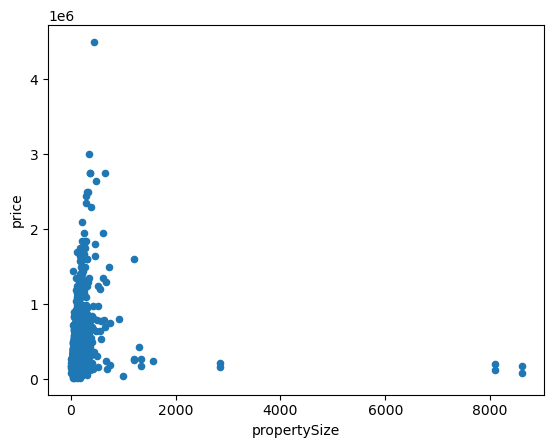

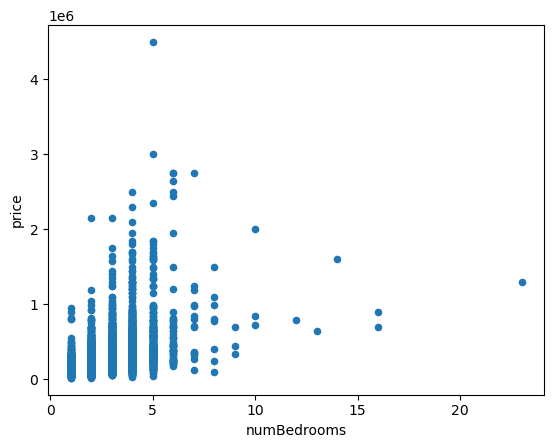

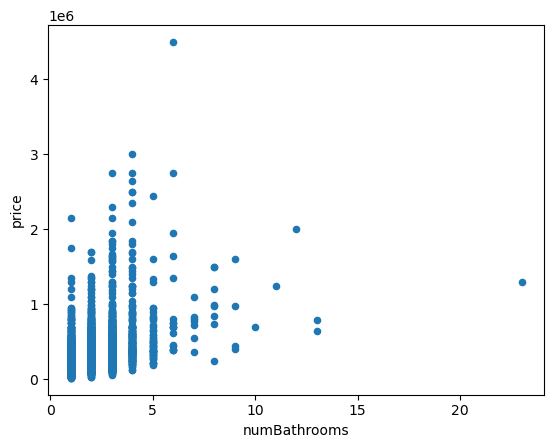

In [242]:
# plot scatter to check house / price
df[["propertySize", "price"]].plot(x="propertySize", y="price", kind="scatter")
df[["numBedrooms", "price"]].plot(x="numBedrooms", y="price", kind="scatter")
df[["numBathrooms", "price"]].plot(x="numBathrooms", y="price", kind="scatter")

The higghest correlations are bedrooms and bathrooms, property size doesnt seem to influence as much. 
<p>Of course we are looking for the for the data of the whole countri, once we start to segragate the data we might have a better undestanding</p>